# Unit Testing

A unit test is a test that operates on an individual unit of software. A unit test aims to validate that the tested unit works as designed.
 
A unit is the smallest testable part of an application, such as a `function`, `method`, or `class`. Unit testing aims to validate that each unit of the software performs as expected.

In Python, there are several tools to help you write, organize, run, and automate your unit test. In the Python standard library, you’ll find two of these tools:

- **`doctest`:** Python’s doctest module is a lightweight testing framework that provides quick and straightforward test automation. It can read the test cases from your project’s documentation and your code’s docstrings. This framework is shipped with the Python interpreter as part of the batteries-included philosophy.
- **`unittest`:** The unittest package is also a testing framework. However, it provides a more complete solution than doctest. In the following sections, you’ll learn and work with unittest to create suitable unit tests for your Python code.

<p>Python’s <code>doctest</code> module is a lightweight <a href="https://en.wikipedia.org/wiki/Test_automation#Framework_approach_in_automation">testing framework</a> that provides quick and straightforward <a href="https://en.wikipedia.org/wiki/Test_automation">test automation</a>. It can read the test cases from your project’s documentation and your code’s docstrings. This framework is shipped with the Python interpreter as part of the batteries-included philosophy.</p>

<div class="alert alert-primary" role="alert">
<strong>Note:</strong>
<ul>
<li>To dive deeper into <code>doctest</code>, <a href="https://docs.python.org/3/library/doctest.html" target="_blank">https://docs.python.org/3/library/doctest.html</a></li>
<li>To dive deeper into <code>unittest</code>, <a href="https://docs.python.org/3/library/unittest.html" target="_blank">https://docs.python.org/3/library/unittest.html</a></li>
</ul>
</div>

<p>The <code>unittest</code> <a href="https://realpython.com/python-modules-packages/#python-packages">package</a> is also a testing framework. However, it provides a more complete solution than <code>doctest</code>. In the following sections, we will learn and work with <a href="https://docs.python.org/3/library/unittest.html#module-unittest"><code>unittest</code></a> to create suitable unit tests for your Python code.</p>

# Getting to Know Python’s unittest 

(For reference, please check: [https://realpython.com/python-unittest/](https://realpython.com/python-unittest/). Here I have just copied everything to learn more about the unit test.)

The `unittest` framework is directly available in the standard library, so we don’t have to install anything to use this tool.

The framework uses an object-oriented approach and supports some essential concepts that facilitate test creation, organization, preparation, and automation:

1. **Test case:** An individual unit of testing. It examines the output for a given input set.
2. **Test suite:** A collection of test cases, test suites, or both. They’re grouped and executed as a whole.
3. **Test fixture:** A group of actions required to set up an environment for testing. It also includes the teardown processes after the tests run.
4. **Test runner:** A component that handles the execution of tests and communicates the results to the user.

In the following sections, you’ll dive into using the unittest package to create test cases, suites of tests, fixtures, and, of course, run your tests.

### 1. Organizing Your Tests With the TestCase Class

The `unittest` package defines the `TestCase` class, which is primarily designed for writing unit tests. To start writing your test cases, you just need to import the class and subclass it. Then, you’ll add methods whose names should begin with test. These methods will test a given unit of code using different inputs and check for the expected results.

Here’s a quick test case that tests the built-in abs() function:


In [1]:
import unittest

class TestAbsFunction(unittest.TestCase):
    def test_positive_number(self):
        self.assertEqual(abs(10), 10)

    def test_negative_number(self):
        self.assertEqual(abs(-10), 10)

    def test_zero(self):
        self.assertEqual(abs(0), 0)

The `abs()` function takes a number as an argument and returns its absolute value. In this test case, you have three test methods. Each method checks for a specific input and output combination. To create the test case, you subclass the TestCase class and add three methods:
- The first method checks whether `abs()` returns the correct value when you pass a positive number. 
- The second method checks the expected behavior with a negative number. 
- Finally, the third method checks the return value of abs() when you use 0 as an argument.

Note that to check the conditions, you use the `.assertEqual()` method, which your class inherits from `TestCase`. 

### 2. Creating Test Cases

Before you write tests with `unittest`, you need some code to test. Suppose that you need to get a person’s age, process that information, and display their current life stage. For example, if the person’s age is:
- Between 0 and 9, both included, the function should return "Child".
- Greater than 9 and less than or equal to 18, the function should return "Adolescent".
- Greater than 18 and less than or equal to 65, the function should return "Adult".
- Greater than 65 and less than or equal to 150, the function should return "Golden age".
- Negative or greater than 150, the function should return "Invalid age".

In [2]:
# age.py
def categorize_by_age(age):
    if 0 <= age <= 9:
        return "Child"
    elif 9 < age <= 18:
        return "Adolescent"
    elif 18 < age <= 65:
        return "Adult"
    elif 65 < age <= 150:
        return "Golden age"
    else:
        return f"Invalid age: {age}"

In [6]:
categorize_by_age(5)

'Child'

In [5]:
categorize_by_age(10)

'Adolescent'

In [9]:
categorize_by_age(-20)

'Invalid age: -20'

This function should return correct results with different age values. To make sure that the function works correctly, you can write some unittest tests.

Following the pattern from the previous section, you’ll start by subclassing TestCase and add some methods that will help you test different input values and the corresponding results:

In [10]:
# test_age.py

import unittest

# from age import categorize_by_age

class TestCategorizeByAge(unittest.TestCase):
    def test_child(self):
        self.assertEqual(categorize_by_age(5), "Child")

    def test_adolescent(self):
        self.assertEqual(categorize_by_age(15), "Adolescent")

    def test_adult(self):
        self.assertEqual(categorize_by_age(30), "Adult")

    def test_golden_age(self):
        self.assertEqual(categorize_by_age(70), "Golden age")

    def test_negative_age(self):
        self.assertEqual(categorize_by_age(-1), "Invalid age: -1")

    def test_too_old(self):
        self.assertEqual(categorize_by_age(151), "Invalid age: 151")

In this example, you create a subclass of TestCase with the descriptive name TestCategorizeByAge. Note that the class name starts with Test, which is a widely used convention to make the purpose of the class immediately clear to anyone reading your code.

Also, note that the containing file is called `test_age.py`. By default, unittest supports test discovery based on the name of test modules. The default naming pattern is `test*.py`. Here, the asterisk (`*`) represents any sequence of characters, so starting your modules with test is recommended if you want to take advantage of the default test discovery configuration.

Then, you define six methods. Each method tests for an input value and the expected result. The methods use the `.assertEqual()` method from the parent class to check whether the function’s output equals the expected value.

Note that the tests above check every possible branch in the `categorize_by_age()` function. However, they don’t cover the boundary cases where the input age is the lower or upper limit of the interval. To make sure that the function responds as expected in those cases, you can add the following tests:

In [12]:
# test_age.py

import unittest

class TestCategorizeByAge(unittest.TestCase):
    def test_child(self):
        self.assertEqual(categorize_by_age(5), "Child")               # assertEqual() from Parent class unittest

    def test_adolescent(self):
        self.assertEqual(categorize_by_age(15), "Adolescent")         # assertEqual() from Parent class unittest

    def test_adult(self):
        self.assertEqual(categorize_by_age(30), "Adult")              # assertEqual() from Parent class unittest

    def test_golden_age(self):
        self.assertEqual(categorize_by_age(70), "Golden age")         # assertEqual() from Parent class unittest

    def test_negative_age(self):
        self.assertEqual(categorize_by_age(-1), "Invalid age: -1")    # assertEqual() from Parent class unittest

    def test_too_old(self):
        self.assertEqual(categorize_by_age(151), "Invalid age: 151")  # assertEqual() from Parent class unittest
        
    # for boundary values   
    def test_boundary_child_adolescent(self):
        self.assertEqual(categorize_by_age(9), "Child")               # assertEqual() from Parent class unittest
        self.assertEqual(categorize_by_age(10), "Adolescent")         # assertEqual() from Parent class unittest

    def test_boundary_adolescent_adult(self):
        self.assertEqual(categorize_by_age(18), "Adolescent")         # assertEqual() from Parent class unittest
        self.assertEqual(categorize_by_age(19), "Adult")              # assertEqual() from Parent class unittest

    def test_boundary_adult_golden_age(self):
        self.assertEqual(categorize_by_age(65), "Adult")              # assertEqual() from Parent class unittest
        self.assertEqual(categorize_by_age(66), "Golden age")         # assertEqual() from Parent class unittest

These test methods have two assertions each. The first assertion checks for the upper limit of the age interval, and the second assertion checks for the lower limit of the next age interval.

Using multiple assertions in a test method helps you reduce boilerplate code. For example, if you use a single assertion to write these tests, then you’ll have to write six test methods instead of just three. Each method will need a unique name, which can be a challenge.

In general, using multiple assertions in your test methods has the following pros:

- **Efficiency:** Multiple assertions in a single test can reduce repetitive code. It can also make tests run faster in those scenarios where you have setup and teardown requirements for each test.
- **Contextual testing:** Multiple assertions might be necessary to check that a function behaves correctly in a specific context.
- **Convenience:** Multiple assertions in a test can be more straightforward and less tedious to write compared to writing multiple single-assertion tests.

The approach also has its cons:

- **Clarity and isolation:** When a test with multiple assertions fails, it can be harder to immediately identify which assertion caused the failure. This can go against your debugging process.
- **Breakage risk:** When an early assertion in a test fails, subsequent assertions are not executed. This can hide additional issues.
- **Test purpose blurring:** When a test has multiple assertions, it can become less focused. This can make the test harder to understand.

With the test cases in place, you’re ready to run them and see whether your `categorize_by_age()` function works as expected.


### 3. Running unittest Tests

Once you’ve written the tests, you need a way to run them. You’ll have at least two standard ways to run tests with unittest:

1. **Make the test module executable:** To make a test module executable in unittest, you can add the following code to the end of the module:
    ```python 
      # test_age.py
      # add following at the end of the test_age.py file

      if __name__ == "__main__":
          unittest.main()
    ```
    The `main()` function from unittest allows you to load and run a set of tests. You can also use this function to make the test module executable. Once you’ve added these lines of code, you can run the module as a regular Python script: 
    ```python
    $ python test_age.py
    ```
    This command runs the tests from `test_age.py`. In the output, every dot represents a passing test. Then, you have a quick summary of the number of run tests and the execution time. All the tests passed, so you get an OK at the end of the output.

    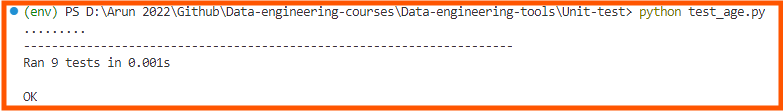

    Among other arguments, the `main()` function takes the `verbosity` one. With this argument, you can tweak the output’s verbosity, which has three possible values:

    - 0 for quiet
    - 1 for normal
    - 2 for detailed
  
    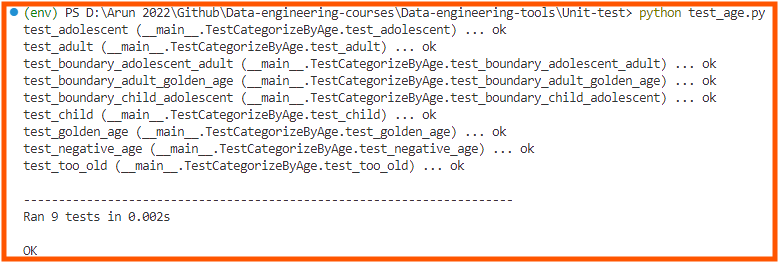

    This output is more detailed. It shows the tests and their result. At the end, it summarizes the test run as usual.

    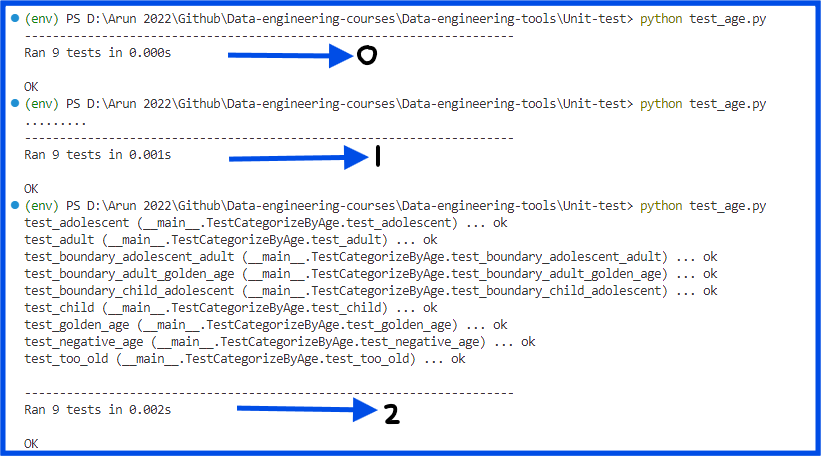

    If you want to make the detailed output more descriptive, then you can add docstrings to your tests like in the following code snippet:

    ```python
        class TestCategorizeByAge(unittest.TestCase):
    def test_child(self):
        """Test for 'Child'"""
        self.assertEqual(categorize_by_age(5), "Child")

    def test_adolescent(self):
        """Test for 'Adolescent'"""
        self.assertEqual(categorize_by_age(15), "Adolescent")

    def test_adult(self):
        """Test for 'Adult'"""
        self.assertEqual(categorize_by_age(30), "Adult")

    def test_golden_age(self):
        """Test for 'Golden age'"""
        self.assertEqual(categorize_by_age(70), "Golden age")

    def test_negative_age(self):
        """Test for negative age"""
        self.assertEqual(categorize_by_age(-1), "Invalid age: -1")

    def test_too_old(self):
        """Test for too old"""
        self.assertEqual(categorize_by_age(151), "Invalid age: 151")

    def test_boundary_child_adolescent(self):
        """Test for boundary between 'Child' and 'Adolescent'"""
        self.assertEqual(categorize_by_age(9), "Child")
        self.assertEqual(categorize_by_age(10), "Adolescent")

    def test_boundary_adolescent_adult(self):
        """Test for boundary between 'Adolescent' and 'Adult'"""
        self.assertEqual(categorize_by_age(18), "Adolescent")
        self.assertEqual(categorize_by_age(19), "Adult")

    def test_boundary_adult_golden_age(self):
        """Test for boundary between 'Adult' and 'Golden age'"""
        self.assertEqual(categorize_by_age(65), "Adult")
        self.assertEqual(categorize_by_age(66), "Golden age")
    ```

    then:

    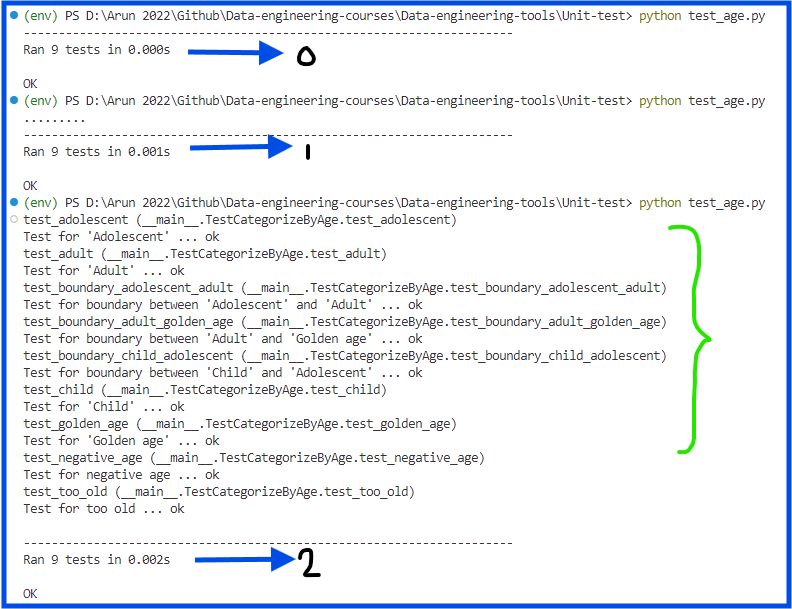
  
2. **Use the command-line interface of unittest:** The unittest package also provides a command-line interface (CLI) that you can use to discover and run your tests. With this interface, you can run tests from modules, classes, and even individual test methods.
    
    - **Running Tests:** With the command-line interface of unittest, you can run tests directly from modules, classes, and from individual test methods. The following sample commands cover those use cases:

        ```bash 
            $ python -m unittest test_module1 test_module2
            $ python -m unittest test_module.TestCase
            $ python -m unittest test_module.TestCase.test_method
        ```

        The first command will run all the tests from test_module1 and test_module2. You can add more modules to the list if you need to. The second command allows you to run all the tests from a given TestCase class. Finally, the last command lets you run a specific test method from a given TestCase class. 

        As an example, run the following command to execute the tests in your `test_age.py` file:

        ```bash 
        $ python -m unittest test_age
        ```

        **Discovering Tests Automatically:** The unittest framework supports test discovery. The test loader can inspect each module in a given directory looking for classes derived from TestCase. Then, the loader groups the found classes within a complete test suite. For example, to discover and run all the tests that you’ve written so far, run the following command in the directory that contains them:

        ```bash 
        $ python -m unittest discover
        ``` 

        This command locates all tests in the current directory, groups them in a test suite, and finally runs them. You can use the `python -m unittest` as a shortcut for the above command.

        | **Option**	| **Description** |
        |-----------|-------------|
        | `-v`, `--verbose` |	Produces a verbose output |
        | `-p`, `--pattern`	| Allows for using glob patterns and defaults to test*.py | 
        | `-t`, `--top-level-directory`	| Defines the top-level directory of a project |
        | `-b`, `--buffer`	| Buffers the standard output and error streams during the test execution |
        | `-c`, `--catch`	| Waits for the current test to run and reports all the results up to the point Ctrl+C is pressed during the test execution |
        | `-f`, `--failfast`	| Stops the test run on the first error or failure | 
        | `-k`	| Only runs test methods and classes that match the pattern or substring |
        | `--locals`	| Shows local variables in tracebacks |
        | `--durations N` |	Shows the N slowest test cases (N=0 for all) |

 ### 4. Skipping Tests

- The `unittest` framework also supports skipping individual test methods and even whole test case classes. 
- Skipping tests allows you to temporarily bypass a test case without permanently removing it from your test suite.

Here are some common situations where you may need to skip tests:

- **Incomplete feature:** When you have an incomplete feature, you’ll need to skip the related tests to avoid false negatives.
- **External services:** When some of your tests depend on external services or resources that aren’t available, you may need to skip them until the service is back.
- **Conditional execution:** When you have tests that depend on specific conditions, such as a platform or a Python version, then you can conditionally skip the tests based on dynamic conditions.
- **Known failures:** When your code has a known bug, you might skip the failing test with a reference to the bug report.
- **Performance considerations:** When you have tests that are time-consuming or resource-intensive, you might want to skip them during regular development cycles to speed up the testing process.
- **Deprecated features:** When you have deprecated features that haven’t been removed yet, you can skip their related tests until the feature is removed entirely.

The following decorators will help you with the goal of skipping tests during your test running process:

| Decorator	| Description |
|-----------|-------------|
| `@unittest.skip(reason)`	| Skips the decorated test |
| `@unittest.skipIf(condition, reason)`	| Skips the decorated test if condition is true |
| `@unittest.skipUnless(condition, reason)`	| Skips the decorated test unless condition is true |


In these decorators, the reason argument should describe why the test will be skipped. Consider the following toy example that shows how the decorators work:

In [ ]:
# skip_test.py
import sys
import unittest

class SkipTestExample(unittest.TestCase):
    @unittest.skip("Unconditionally skipped test")
    def test_unimportant(self):
        self.fail("The test should be skipped")

    @unittest.skipIf(sys.version_info < (3, 12), "Requires Python >= 3.12")
    def test_using_calendar_constants(self):
        import calendar

        self.assertEqual(calendar.Month(10), calendar.OCTOBER)

    @unittest.skipUnless(sys.platform.startswith("win"), "Requires Windows")
    def test_windows_support(self):
        from ctypes import WinDLL, windll

        self.assertIsInstance(windll.kernel32, WinDLL)

if __name__ == "__main__":
    unittest.main(verbosity=2)

This can by compiled by: 

```bash 
$ python skip_test.py
```

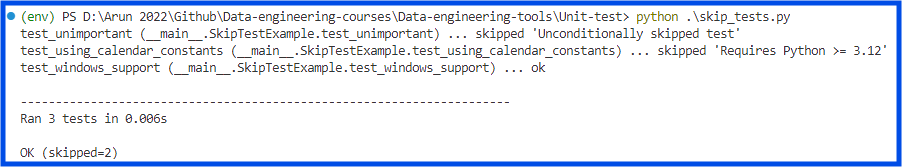 

In this sample test module, you have three test methods. 
- The first one never runs because you use the `@skip` decorator on it. 
- The second test method only runs if you’re on a Python version equal to or greater than `3.12`. 
- Finally, the last test method runs if you’re on a Windows box.

### 5. Creating Subtests

The unittest framework allows you to distinguish between similar tests using the `subTest()` context manager. 

For example, say that you have a function that checks whether a given number is even:

In [1]:
# even.py
def is_even(number):
    return number % 2 == 0

This function uses the modulo operator to check whether the input number is even. Here are some basic tests for the function:

In [ ]:
import unittest

# from even import is_even

class TestIsEven(unittest.TestCase):
    def test_even_number(self):
        self.assertEqual(is_even(2), True)

    def test_odd_number(self):
        self.assertEqual(is_even(3), False)

    def test_negative_even_number(self):
        self.assertEqual(is_even(-2), True)

    def test_negative_odd_number(self):
        self.assertEqual(is_even(-3), False)

if __name__ == "__main__":
    unittest.main(verbosity=2)

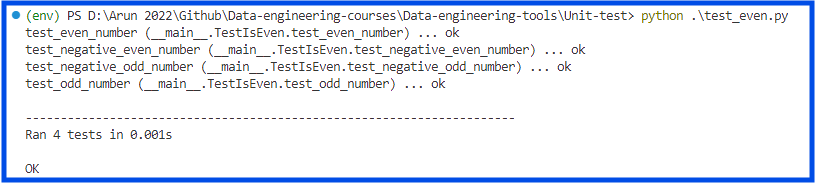

If we set in the `test_negative_odd_number`, to -4, it gives an test fail message as:

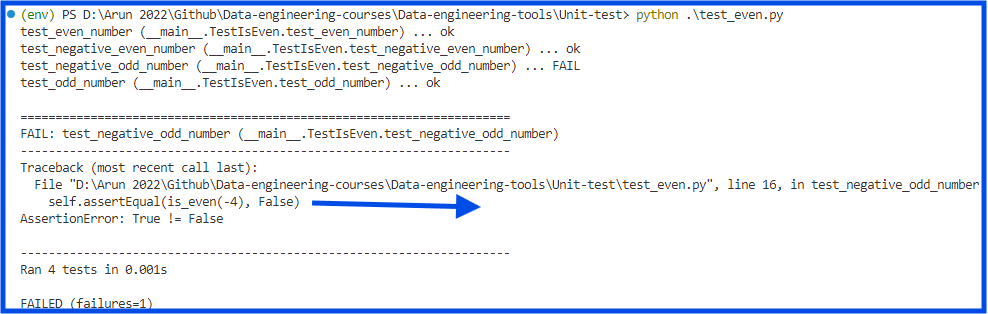


These tests take positive and negative numbers and check whether the function’s result is correct by comparing it with the appropriate Boolean value. However, you’ve only tested a couple of input values. If you want to expand the input dataset, then you can use subtests.


To create a subtest, you’ll use the `.subTest()` method, which returns a context manager that executes the enclosed code block as a subtest. You can use this context manager to provide multiple input values for your tests.

Here’s the above example using subtests to check for multiple numbers:

In [ ]:
import unittest

from even import is_even

class TestIsEven(unittest.TestCase):
    def test_even_number(self):
        for number in [2, 4, 6, -8, -10, -12]:
            with self.subTest(number=number):
                self.assertEqual(is_even(number), True)

    def test_odd_number(self):
        for number in [1, 3, 5, -7, -9, -11]:
            with self.subTest(number=number):
                self.assertEqual(is_even(number), False)

if __name__ == "__main__":
    unittest.main(verbosity=2)

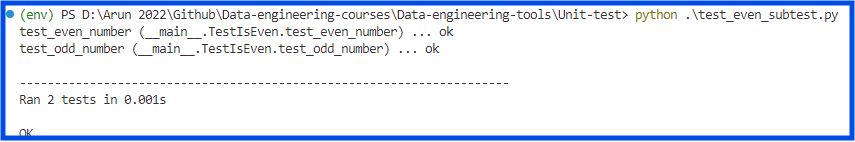


In this example, you use a for loop that iterates over a list of input values. Then, you use the with statement to manage the context that .subTest() constructs. In that context, you run the assertion with the current number, which works as a subtest. Go ahead and run the test to check the results.

## Exploring the Available Assert Methods

1. **Comparing Values:** (Check `prime_v1.py` and `test_prime_v1.py`)
   
   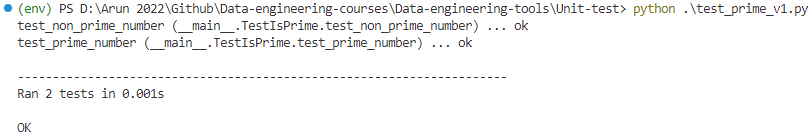

    | **Method**	| **Comparison** |
    |---------------|----------------|
    | `.assertEqual(a, b)`	| a == b |
    | `.assertNotEqual(a, b)`	| a != b |
    | `.assertTrue(x)`	| bool(x) is True |
    | `.assertFalse(x)`	| bool(x) is False |

2. **Comparing Objects by Their Identity:** (check `test_identity.py`)
   
   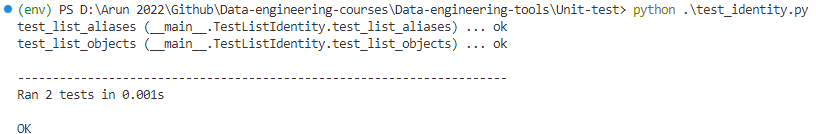

    | **Method**	| **Comparison** |
    |---------------|----------------|
    | `.assertIs(a, b)`	| a is b |
    | `.assertIsNot(a, b)`	| a is not b |
    | `.assertIsNone(x)`	| x is None | 
    | `.assertIsNotNone(x)`	| x is not None | 

3. **Comparing Collections:** (check `test_collection.py`)
   
   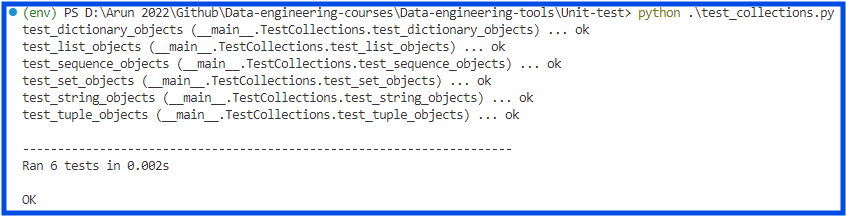

    | **Method**	| **Comparison** |
    |---------------|----------------|
    | `.assertSequenceEqual(a, b)`	| Equality of two sequences | 
    | `.assertMultiLineEqual(a, b)`	| Equality of two strings | 
    | `.assertListEqual(a, b)`	| Equality of two lists |
    | `.assertTupleEqual(a, b)`	| Equality of two tuples |
    | `.assertDictEqual(a, b)`	| Equality of two dictionaries |
    | `.assertSetEqual(a, b)`	| Equality of two sets |

4. **Running Membership Tests:** A membership test is a check that allows you to determine whether a given value is or is not in a collection of values. You’ll run these tests with the in and not in operators. Again, the TestCase class has methods for these types of checks:
    | **Method**	| **Comparison** |
    |---------------|----------------|
    | `.assertIn(a, b)`	| a in b |
    | `.assertNotIn(a, b)`	| a not in b |

    checkout the `test_membership.py` file. It's output is:

    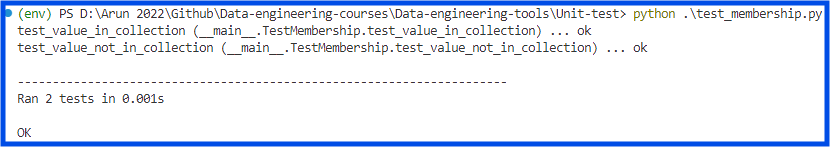


5. **Checking for an Object’s Type:** Checking the type of the object that a function, method, or callable returns may be another common requirement in testing. For this purpose, the TestClass also has dedicated assert methods:

    | **Method**	| **Comparison** |
    |---------------|----------------|
    | `.assertIsInstance(a, b)`	| isinstance(a, b) |
    | `.assertNotIsInstance(a, b)`	| not isinstance(a, b) |

    checkout the `vehicles.py` and `test_vehicles.py` files. The `python test_vehicles.py` give:

    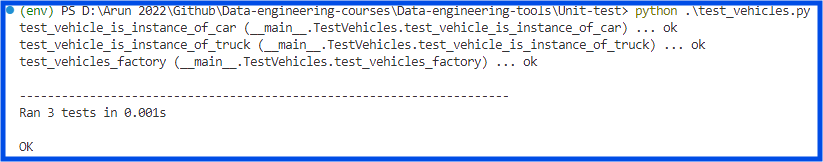 

6. **Testing for Exceptions:** Sometimes, you’ll need to check for exceptions. Yes, sometimes your own code will raise exceptions as part of its behavior. The TestCase class also provides assert methods that allow you to check for exceptions:

    | **Method**	| **Comparison** |
    |---------------|----------------|
    | `.assertRaises(exc, fun, *args, **kwds)` | fun(*args, **kwds) raises exc |
    | `.assertRaisesRegex(exc, r, fun, *args, **kwds)` | fun(*args, **kwds) raises exc and the message matches regex r |

    The first method allows checking for explicit exceptions without considering the associated error message, and the second method checks for exceptions and considers the associated message using regular expressions. 

    We can also write above table as:
    
    | **Method** | **Comparison** |
    |------------|----------------|
    | `.assertRaises(exception, callable)`	| callable() raises exception |
    | `.assertDoesNotRaise(exception, callable)` | callable() does not raise exception |


    Checkout the `prime_v2.py` and `test_prime_v2.py` and it's output is:
    
    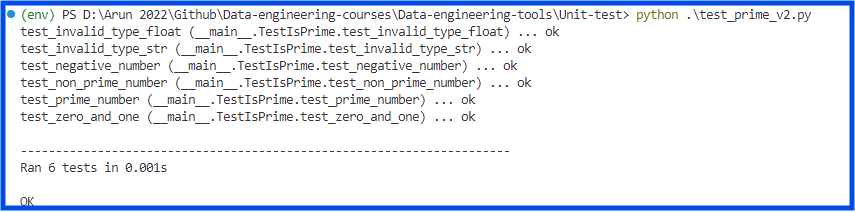

7. **Warnings:** The TestCase class also provides some additional assert methods that help you with warnings and logs:

    | **Method** | **Comparison** |
    |------------|----------------|
    | `.assertWarns(warn, fun, *args, **kwds)`	| fun(*args, **kwds) raises warn |
    | `.assertWarnsRegex(warn, r, fun, *args, **kwds)`	| fun(*args, **kwds) raises warn and the message matches regex r |
    | `.assertLogs(logger, level)`	| The with block logs on logger with minimum level |
    | `.assertNoLogs(logger, level)`	| The with block does not log on logger with minimum level |

9. **Using Custom Assert Methods:** As with many things in Python, you can also create your assert methods to facilitate your test writing process. To do this, you can subclass TestCase and extend the class with new assertion methods.

    For example, say that you frequently need to check that all the values in a list are integer numbers. In that case, you can create a test case class like the following:

    ```python
    # test_custom.py
    import unittest

    class CustomTestCase(unittest.TestCase):
        def assertAllIntegers(self, values):
            for value in values:
                self.assertIsInstance(
                    value,
                    int,
                )
    ```

    This class inherits from TestCase. So, it provides all the assert methods you’ve seen so far. In addition, you extend the functionality of TestCase with a new assert method called .assertAllIntegers(), which takes a list of values and checks whether all the values are integer numbers.


    Here’s how you can use this class in practice:

    ```python 
    import unittest

    class CustomTestCase(unittest.TestCase):
        # ...

    class TestIntegerList(CustomTestCase):
        def test_values_are_integers(self):
            integers_list = [1, 2, 3, 4, 5]
            self.assertAllIntegers(integers_list)

    if __name__ == "__main__":
        unittest.main()
    ```

    In this class, you define a test that uses the .assertAllIntegers() method to test a list where all the values are integers. This test must pass successfully. You can experiment with other lists where the values don’t have the correct type to see how the CustomTestCase class works.


    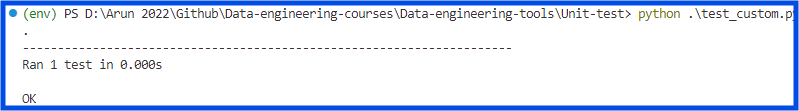


## Grouping Your Tests With the TestSuite Class 

The unittest framework has a class called TestSuite that you can use to create groups of tests and run them selectively. Test suites can be useful in many situations, including the following:

- **Complex projects:** In complex projects with many features, test suites help you organize tests into manageable and logical groups.
- **Different testing levels:** Test suites allow you to organize your tests according to their testing levels, including unit tests, integration tests, and system tests.
- **Selective testing:** Test suites allow you to create logical groups of tests that you can run selectively, saving time and resources.
- **Environment-specific testing:** Test suites allow group tests that are supposed to run on specific platforms, such as Windows, Linux, macOS, or others.

To illustrate how to create test suites, say that you have a module called `calculations.py` (checkout this file in the repo) that defines basic arithmetic and statistical operations. In this module, you have several functions. Some of them are basic arithmetic operations, and others are statistical operations. From a testing point of view, a good approach is to write the following test cases, check `test_calculations.py`. 

These tests work as expected. Suppose you need a way to run the arithmetic and statistical tests separately. In this case, you can create test suites. 

#### Creating Test Suites With the `TestSuite()` Constructor 

The `TestSuite` class allows you to create test suites. The class constructor takes the tests argument that must be an iterable of tests or other test suites. 
```python 

def make_suite():
    arithmetic_tests = [
        TestArithmeticOperations("test_add"),
        TestArithmeticOperations("test_subtract"),
        TestArithmeticOperations("test_multiply"),
        TestArithmeticOperations("test_divide"),
    ]
    return unittest.TestSuite(tests=arithmetic_tests)

if __name__ == "__main__":
    suite = make_suite()
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)
```
When we run the test, 
```bash 
$ python test_calculations.py
```

This command only runs the four tests in the suite, skipping the rest of the tests in the `test_calculations.py` file.

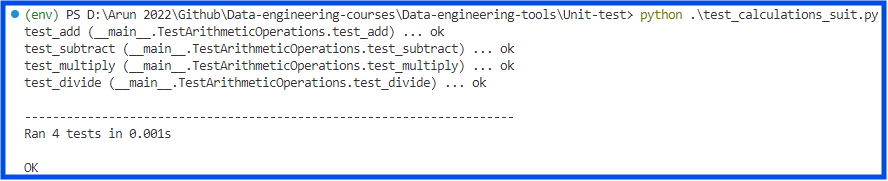 

#### Adding Tests to a Suite: `.addTest()` and `.addTests()`

You can also use the `.addTest()` method to add individual tests to an existing suite. To do this, you can do something like the following:



## Getting to know python's doctest 

**References:** [https://docs.python.org/3/library/doctest.html](https://docs.python.org/3/library/doctest.html)

